## Implementação e aplicação do algoritmo KNN para predição

### Função para dividir o dataset entre dados para treino e dados que serão usados para realizar as predições

In [122]:
from sklearn import datasets
import pandas as pd
import random 
import numpy as np
import operator
import math
import matplotlib.pyplot as plt  
import pylab as pl
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import classification_report, confusion_matrix 

def init(data, target, split):
    x_treino = []
    x_test = []
    y_treino = []
    y_test = []
    for i in range(data.shape[0]):
        if random.random() < split:
            x_treino.append(data[i])
            y_treino.append(target[i])
        else:
            x_test.append(data[i])    
            y_test.append(target[i])
    return x_treino, x_test, y_treino, y_test

### Métrica usada para calcular a distância entre duas instâncias

In [123]:
def distancia_euclidiana(instanceA, instanceB):
    ans = 0
    for i in range(len(instanceA)):
        ans += (instanceA[i] - instanceB[i]) ** 2
    return math.sqrt(ans)

### Função que retorna os K vizinhos mais próximos de uma instância

In [124]:
def get_nearest_neighbors(x_treino, y_treino, instance_test, k):

    distancias = []
    for i in range(len(x_treino)):
        dist = distancia_euclidiana(x_treino[i], instance_test)
        distancias.append((dist, y_treino[i]))
    distancias.sort(key=operator.itemgetter(0))
    neighbors = []
    for i in range(k):
        neighbors.append(distancias[i][1])
    return neighbors

In [125]:
def target_k_neighbors(vizinhos):
    ans = {}
    for i in vizinhos:
        if i in ans:
            ans[i] += 1
        else:
            ans[i] = 1
    
    qtd = 0
    for i, j in ans.items():
        if qtd < j:
            qtd = j
            best = i
    return best

### Taxa de erro de uma predição

In [126]:
def getPrecision(instanceA, instanceB):
    erros = 0
    for i in range(len(instanceA)):
        if instanceA[i] != instanceB[i]:
            erros += 1
    
    return erros / len(instanceA)

### Função KNN
Essa função retorna um vetor indicando a predição feita para cada caso de teste

In [127]:
def knn(x_treino, y_treino, x_test, K):
    # scaler = StandardScaler()  
    # scaler.fit(x_treino)
    # x_treino = scaler.transform(x_treino)  
    # x_test = scaler.transform(x_test) 
    y_pred = []
    for i in range(len(x_test)):
        vizinhos = get_nearest_neighbors(x_treino, y_treino, x_test[i], K)
        ans = target_k_neighbors(vizinhos) 
        y_pred.append(ans)
    return y_pred

### Experimentos utilizando a base de dados IRIS 

In [135]:
K = 5
iris = datasets.load_iris()
x_treino, x_test, y_treino, y_test = init(iris.data, iris.target, 0.6)
y_pred = knn(x_treino, y_treino, x_test, K)

#### Resultados da predições usando aproximadamente 60% da base para treino e com parâmetro K = 5

In [136]:
for i in range(len(y_pred)):
    print('Original:' + iris.target_names[y_test[i]]  + ' Predito:' + iris.target_names[y_pred[i]])

Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:setosa Predito:setosa
Original:versicolor Predito:versicolor
Original:versicolor Predito:versicolor
Original:versicolor Predito:versicolor
Original:versicolor Predito:versicolor
Original:versicolor Predito:virginica
Original:versicolor Predito:versicolor
Original:versicolor Predito:versicolor
Original:versicolor Predito:versicolor
Original:versicolor Predito:versicolor
Original:versicolor Predito:versicolor
Original:versicolor Predito:versicolor
Original:versi

In [137]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[18  0  0]
 [ 0 16  1]
 [ 0  1 20]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.94      0.94      0.94        17
           2       0.95      0.95      0.95        21

   micro avg       0.96      0.96      0.96        56
   macro avg       0.96      0.96      0.96        56
weighted avg       0.96      0.96      0.96        56



Resultado obtido com aproximadamente 60% dos dados para treino e parâmetro K = 5

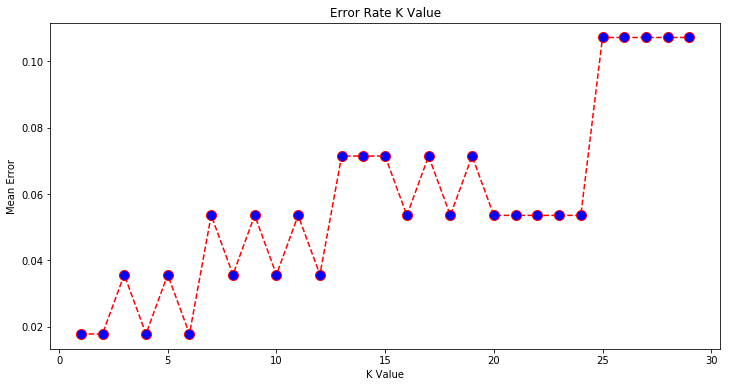

In [138]:
error = []
for i in range(1,30):
    y_pred = knn(x_treino, y_treino, x_test, i)
    ans = getPrecision(y_test, y_pred)
    error.append(ans)
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()   

O gráfico acima mostra o erro médio obtido variando o parâmetro K entre 1 e 30.

### Experimentos utilizando a base de dados Boston

Text(0.5,1,'Distribuição do target da base de dados Boston')

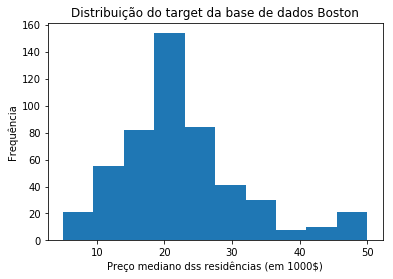

In [60]:
plt.hist(boston.target)
plt.xlabel('Preço mediano das residências (em 1000$)')
plt.ylabel('Frequência')
plt.title('Distribuição do target da base de dados Boston')

A partir do histograma acima, é possível perceber que os valores do target da base de dados boston está distribuido em valores reais entre 5 e 50, o que é um intervalo muita grande de valores para se realizar uma predição usando o KNN. Sendo assim, vamos dividir esses dados em 4 classes. A primeira classe será as instâncias com valores no intervalo (0, 12.5], segunga classe instâncias com valores entre (12.5,25.0], terceira classe (25.0,37.5] e por fim a ultima classe conterá as intâncias com valores no intervalo (35.5,50].

In [110]:
target = []
classes = [12.5, 25.0, 37.5, 50.0]
for i in range(len(boston.target)):
    for j in range(len(classes)):
        if boston.target[i] <= classes[j]:
            target.append(j)
            break

In [111]:
K = 5
boston = datasets.load_boston()
x_treino, x_test, y_treino, y_test = init(boston.data, target, 0.7)
y_pred = knn(x_treino, y_treino, x_test, K)

In [112]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[ 9  6  0  0]
 [ 8 84  8  0]
 [ 0 13 14  0]
 [ 0  9  4  1]]
              precision    recall  f1-score   support

           0       0.53      0.60      0.56        15
           1       0.75      0.84      0.79       100
           2       0.54      0.52      0.53        27
           3       1.00      0.07      0.13        14

   micro avg       0.69      0.69      0.69       156
   macro avg       0.70      0.51      0.50       156
weighted avg       0.71      0.69      0.67       156



Usando todas as 13 caracteristicas, 70% dos dados para treino e parâmetro K = 5, o algoritmo obteve uma precisão de quase 70% nas predições das classes dos valores medianos das residências.
O próximo passo de nossos experimentos é usar apenas as caracteristicas quem possuem uma relação linear com o target da base de dados.

Text(0,0.5,'Preço')

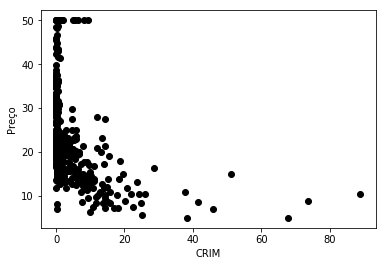

In [101]:
plt.scatter(boston.data[:,0], boston.target, color='black')
plt.xlabel(boston.feature_names[0])
plt.ylabel('Preço')

Text(0,0.5,'Preço')

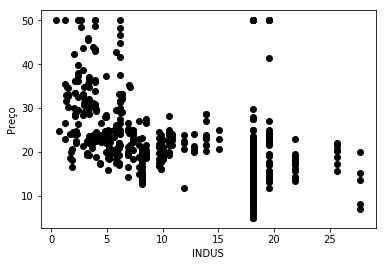

In [27]:
plt.scatter(boston.data[:,2], boston.target, color='black')
plt.xlabel(boston.feature_names[2])
plt.ylabel('Preço')

Text(0,0.5,'Preço')

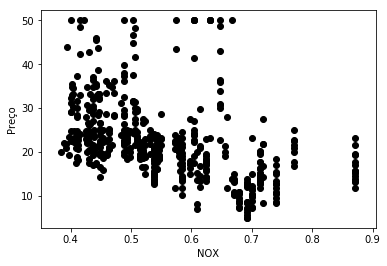

In [28]:
plt.scatter(boston.data[:,4], boston.target, color='black')
plt.xlabel(boston.feature_names[4])
plt.ylabel('Preço')

Taxa de erro na predição usando por 60% dos dados para treinamento e com o parâmetro K = 5

Text(0,0.5,'Preço')

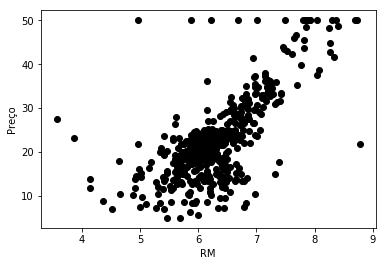

In [29]:
plt.scatter(boston.data[:,5], boston.target, color='black')
plt.xlabel(boston.feature_names[5])
plt.ylabel('Preço')

Text(0,0.5,'Preço')

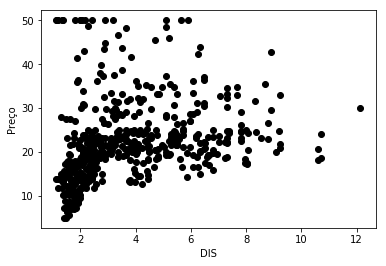

In [30]:
plt.scatter(boston.data[:,7], boston.target, color='black')
plt.xlabel(boston.feature_names[7])
plt.ylabel('Preço')

Text(0,0.5,'Preço')

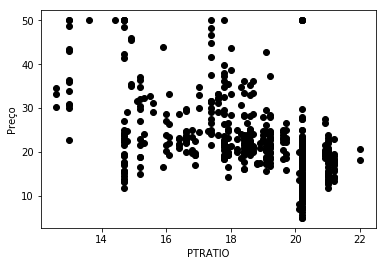

In [31]:
plt.scatter(boston.data[:,10], boston.target, color='black')
plt.xlabel(boston.feature_names[10])
plt.ylabel('Preço')

Text(0,0.5,'Preço')

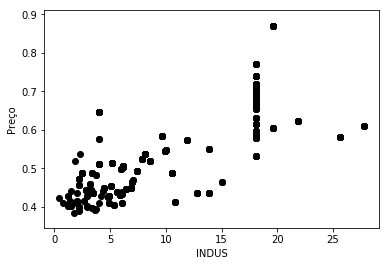

In [50]:
plt.scatter(boston.data[:,2], boston.data[:,4], color='black')
plt.xlabel(boston.feature_names[2])
plt.ylabel(boston.feature_names[4])
plt.ylabel('Preço')

Analisando os gráficos de disperssão acima, é possivel avaliar que a taxa de criminalidade (CRIM), o numero médio
de quartos nas resiências (RM) e a distância média das residências para cinco centros de emprego de Boston (DIS),
são os fatores que possuem maior co-relação com o preço das residências, apesar de alguns outliers. Portanto vamos utilizar agora apenas essas 3 caracteristicas para fazer a predição das classes.

In [119]:
caracteristicas = [0, 5, 7]
dataset = np.zeros((len(boston.data), len(caracteristicas)))

for i in range(len(boston.data)):
    for j in range(len(caracteristicas)):
        dataset[i][j] = boston.data[i][caracteristicas[j]];

In [121]:
K = 5
boston = datasets.load_boston()
x_treino, x_test, y_treino, y_test = init(dataset, target, 0.7)
y_pred = knn(x_treino, y_treino, x_test, K)
print(getPrecision(y_pred, y_test))

0.19863013698630136


In [97]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[ 6  4  0  0]
 [ 2 59  1  1]
 [ 0  6 18  1]
 [ 0  1  0  7]]
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.84      0.94      0.89        63
           2       0.95      0.72      0.82        25
           3       0.78      0.88      0.82         8

   micro avg       0.85      0.85      0.85       106
   macro avg       0.83      0.78      0.80       106
weighted avg       0.85      0.85      0.85       106



O resultado após a escolhas das variáveis que mais influênciam o valor das casas foi bem melhor que o resultado
usando todas as caracteristicas.


### Referências 

http://sfb649.wiwi.hu-berlin.de/fedc_homepage/xplore/tutorials/mvahtmlnode11.html#c1bhpcpfig